In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pulp import *
import seaborn as sn

In [2]:
df=pd.read_csv('../../../Datasets/cop_data.csv')
df.head()

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId
0,-77.607990,43.183680,d981912bde17ff11baeec440d2962c55,20-180265,1010 Joseph Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.183680,-77.607990,1
1,-77.643147,43.141723,9aed9ae5ee7f83638ee33ccff49cf6b9,20-180404,294 Rugby Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,F,BLACK,NON HISPANIC,28,25-44,43.141723,-77.643147,2
2,-77.611200,43.178448,b0c3f83c934aeea9486ccc2362e0cee6,20-179396,77 Ketchum St,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,WHITE,NON HISPANIC,49,45-Older,43.178448,-77.611200,3
3,-77.613357,43.168276,b83cd8b57bb9048cca4830620cbfab07,20-179526,123 Upper Falls Blvd,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.168276,-77.613357,4
4,-77.589725,43.181775,42bb767348c1f8a5e4c085b67ab14732,20-177327,334 Roycroft Dr,2020/08/06 04:00:00+00,8,2020,Shooting,Yes,M,BLACK,NON HISPANIC,22,15-24,43.181775,-77.589725,5


In [3]:
df['Latitude']

0       43.183680
1       43.141723
2       43.178448
3       43.168276
4       43.181775
          ...    
4160    43.130331
4161    43.159531
4162    43.183934
4163    43.175431
4164    43.142367
Name: Latitude, Length: 4165, dtype: float64

In [4]:
df['Longitude']

0      -77.607990
1      -77.643147
2      -77.611200
3      -77.613357
4      -77.589725
          ...    
4160   -77.637343
4161   -77.654266
4162   -77.610297
4163   -77.584485
4164   -77.636501
Name: Longitude, Length: 4165, dtype: float64

In [5]:
df.shape

(4165, 18)

In [6]:
import haversine as hs
from haversine import Unit

In [7]:

df['coor'] = list(zip(df['Latitude'],df['Longitude']))
df.head()

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId,coor
0,-77.607990,43.183680,d981912bde17ff11baeec440d2962c55,20-180265,1010 Joseph Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.183680,-77.607990,1,"(43.1836795360001, -77.607990462)"
1,-77.643147,43.141723,9aed9ae5ee7f83638ee33ccff49cf6b9,20-180404,294 Rugby Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,F,BLACK,NON HISPANIC,28,25-44,43.141723,-77.643147,2,"(43.14172340100001, -77.643147095)"
2,-77.611200,43.178448,b0c3f83c934aeea9486ccc2362e0cee6,20-179396,77 Ketchum St,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,WHITE,NON HISPANIC,49,45-Older,43.178448,-77.611200,3,"(43.1784481240001, -77.6112000269999)"
3,-77.613357,43.168276,b83cd8b57bb9048cca4830620cbfab07,20-179526,123 Upper Falls Blvd,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.168276,-77.613357,4,"(43.16827618399999, -77.61335654399991)"
4,-77.589725,43.181775,42bb767348c1f8a5e4c085b67ab14732,20-177327,334 Roycroft Dr,2020/08/06 04:00:00+00,8,2020,Shooting,Yes,M,BLACK,NON HISPANIC,22,15-24,43.181775,-77.589725,5,"(43.181775168000094, -77.589725243)"


In [8]:
def distance_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [9]:
# running a loop which will parse location one by one to distance from function 
for _,row in df.iterrows():
    df[row.ID]=df['coor'].apply(lambda x: distance_from(row.coor,x))

In [10]:
df.head()

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,...,c2b3d991683d382e2fa6a992cf89bf1a,3510a163d190b225cd49d3514e0327a7,7a5b91d2ac7c05745a587733a9d3d85b,fea96daaf19f006561d5067091c8d9c8,083d6124b37538f944165f9791a6783c,8f0a264b20a44b89e480f003c072d56a,46669c13e36f3446ad727dd1b6fde8c5,4ea045e139566a67b551e23030b5f812,beaf5dc4819d94b20b98252e45c10fbb,080e50ed93158af0cdcc700bd60b3b7d
0,-77.607990,43.183680,d981912bde17ff11baeec440d2962c55,20-180265,1010 Joseph Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,...,1.20,4.47,0.39,0.75,2.72,6.39,4.61,0.19,2.12,5.14
1,-77.643147,43.141723,9aed9ae5ee7f83638ee33ccff49cf6b9,20-180404,294 Rugby Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,...,5.05,4.23,5.22,4.71,4.35,1.35,2.18,5.40,6.06,0.54
2,-77.611200,43.178448,b0c3f83c934aeea9486ccc2362e0cee6,20-179396,77 Ketchum St,2020/08/08 04:00:00+00,8,2020,Shooting,No,...,0.99,4.02,0.54,0.18,2.45,5.76,4.08,0.61,2.19,4.51
3,-77.613357,43.168276,b83cd8b57bb9048cca4830620cbfab07,20-179526,123 Upper Falls Blvd,2020/08/08 04:00:00+00,8,2020,Shooting,No,...,1.28,3.11,1.65,1.09,2.66,4.65,3.46,1.76,2.47,3.44
4,-77.589725,43.181775,42bb767348c1f8a5e4c085b67ab14732,20-177327,334 Roycroft Dr,2020/08/06 04:00:00+00,8,2020,Shooting,Yes,...,1.16,4.05,1.87,1.96,4.18,6.90,5.79,1.69,0.82,5.80


In [11]:
distances_df=df.iloc[:,19:4183]
distances_df

,d981912bde17ff11baeec440d2962c55,9aed9ae5ee7f83638ee33ccff49cf6b9,b0c3f83c934aeea9486ccc2362e0cee6,b83cd8b57bb9048cca4830620cbfab07,42bb767348c1f8a5e4c085b67ab14732,a8c5e088b79b16709df3ce1589438e4b,1642e9ea9f20bc6c190560580241ad24,7c4ff4e2a92a48af3a1bebb390a4fdbc,5e631196f8d60399474687757b4fe570,d604b745f7537a66e8883bef6da030d6,...,3a8fa3b922fef8de25821d1a2c02cb96,c2b3d991683d382e2fa6a992cf89bf1a,3510a163d190b225cd49d3514e0327a7,7a5b91d2ac7c05745a587733a9d3d85b,fea96daaf19f006561d5067091c8d9c8,083d6124b37538f944165f9791a6783c,8f0a264b20a44b89e480f003c072d56a,46669c13e36f3446ad727dd1b6fde8c5,4ea045e139566a67b551e23030b5f812,beaf5dc4819d94b20b98252e45c10fbb
0,0.00,5.47,0.64,1.77,1.50,1.50,6.37,5.22,2.73,3.32,...,1.62,1.20,4.47,0.39,0.75,2.72,6.39,4.61,0.19,2.12
1,5.47,0.00,4.84,3.82,6.21,6.21,2.88,0.58,5.92,4.18,...,5.12,5.05,4.23,5.22,4.71,4.35,1.35,2.18,5.40,6.06
2,0.64,4.84,0.00,1.14,1.78,1.78,5.77,4.61,2.67,3.02,...,1.44,0.99,4.02,0.54,0.18,2.45,5.76,4.08,0.61,2.19
3,1.77,3.82,1.14,0.00,2.43,2.43,4.64,3.66,2.65,3.09,...,1.50,1.28,3.11,1.65,1.09,2.66,4.65,3.46,1.76,2.47
4,1.50,6.21,1.78,2.43,0.00,0.00,6.45,6.09,1.57,4.77,...,1.17,1.16,4.05,1.87,1.96,4.18,6.90,5.79,1.69,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,6.39,1.35,5.76,4.65,6.90,6.90,1.91,1.92,6.32,5.50,...,5.75,5.77,4.09,6.20,5.66,5.62,0.00,3.53,6.35,6.60
4161,4.61,2.18,4.08,3.46,5.79,5.79,4.89,1.61,6.06,2.23,...,4.95,4.70,5.34,4.27,3.91,2.59,3.53,0.00,4.48,5.93
4162,0.19,5.40,0.61,1.76,1.69,1.69,6.38,5.14,2.90,3.14,...,1.77,1.33,4.55,0.22,0.69,2.54,6.35,4.48,0.00,2.30
4163,2.12,6.06,2.19,2.47,0.82,0.82,5.95,6.01,0.75,5.20,...,0.98,1.27,3.39,2.45,2.36,4.64,6.60,5.93,2.30,0.00


In [12]:
dist_dict={}

In [13]:
#make some positions (so we can plot this)
positions = dict( ( ID, (df[['ID','Latitude','Longitude']].loc[ID, 'Longitude'], df[['ID','Latitude','Longitude']].loc[ID, 'Latitude']) ) for ID in df.index)

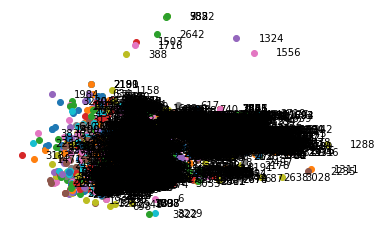

In [14]:
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.gca().axis('off');